# Prediction of Stock Closing Prices Using Regression Models

In [286]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data Preprocessing

In [294]:
# import dataset 
dataset = pd.read_csv('temp.csv')

# construct dependent vector
y = dataset.iloc[:, 12].values

In [295]:
dataset.head(7)

,Open,High,Low,Close,Volume,DateIdx,momt,ROC,williams,Strength,Dev,DChg,ClsNext
0,4.125000,4.125000,4.000000,4.015625,1077600,2,-0.109375,-2.651515,-10.606061,30.061074,0.125000,-0.109375,4.000000
1,4.000000,4.031250,3.953125,4.000000,437200,3,-0.015625,-0.389105,-3.333333,31.761662,0.078125,0.000000,3.843750
2,4.000000,4.000000,3.843750,3.843750,1883600,4,-0.156250,-3.906250,-17.241379,30.887978,0.156250,-0.156250,3.390625
3,3.734375,3.734375,3.390625,3.390625,7931600,5,-0.453125,-11.788618,-58.695652,34.054856,0.343750,-0.343750,3.437500
4,3.500000,3.703125,3.437500,3.437500,11486800,6,0.046875,1.382488,-52.173913,61.081590,0.265625,-0.062500,3.500000
5,3.531250,3.578125,3.093750,3.500000,13136800,7,0.062500,1.818182,-43.478261,55.647564,0.484375,-0.031250,3.484375
6,3.468750,3.562500,3.453125,3.484375,6349600,8,-0.015625,-0.446429,-91.304348,62.988774,0.109375,0.015625,3.578125


In [296]:
# construct explanatory matrix
dataset.drop(dataset.columns[[0,1,2,4,5,12]], axis=1, inplace=True) 
dataset.head()

,Close,momt,ROC,williams,Strength,Dev,DChg
0,4.015625,-0.109375,-2.651515,-10.606061,30.061074,0.125000,-0.109375
1,4.000000,-0.015625,-0.389105,-3.333333,31.761662,0.078125,0.000000
2,3.843750,-0.156250,-3.906250,-17.241379,30.887978,0.156250,-0.156250
3,3.390625,-0.453125,-11.788618,-58.695652,34.054856,0.343750,-0.343750
4,3.437500,0.046875,1.382488,-52.173913,61.081590,0.265625,-0.062500


Feature Scaling

In [297]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(dataset) 
y = sc_y.fit_transform(y.reshape(-1,1))

Split the dataset into Training set and Test set

In [298]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Define root mean squared error

In [299]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(predictions, targets):
    return sqrt(mean_squared_error(predictions, targets))

# Multiple Linear Regression

Fit Multiple Linear Regression to the Training set

In [300]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [301]:
y_pred_ml = regressor.predict(X_train)

Build the Optimal Model Using Backward Elimination

In [302]:
X_train.shape

(3502, 7)

In [303]:
import statsmodels.formula.api as sm
X_train_ml = np.append(arr = np.ones((3502, 1)).astype(int), values = X_train, axis = 1)
X_opt = X_train_ml[:, [0, 1, 2, 3, 4, 5, 6, 7]] # 8 explanatory variables and add one constant column

regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.529e+05
Date:                Wed, 06 Dec 2017   Prob (F-statistic):               0.00
Time:                        20:58:54   Log-Likelihood:                 7831.5
No. Observations:                3502   AIC:                        -1.565e+04
Df Residuals:                    3494   BIC:                        -1.560e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.321      0.748      -0.001       0.001
x1             0.9992      0.001   1431.045      0.000       0.998       1.001
x2            -0.0020      0.001     -2.479      0.013      -0.004      -0.000
x3             0.0006      0.001      0.931      0.352      -0.001       0.002
x4            -0.0076      0.001    -14.053      0.000      -0.009      -0.007
x5            -0.0002      0.001     -0.316      0.752      -0.001       0.001
x6         -1.462e-05      0.001     -0.021      0.983      -0.001       0.001
x7             0.0019      0.001      2.831      0.005       0.001       0.003
==============================================================================
Omnibus:                     3941.655   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2586794.479
Skew:                          -4.989   Prob(JB):                         0.00
Kurtosis:                     135.772   Cond. No.                         3.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
X_opt = X_train_ml[:, [0, 1, 2, 3, 4, 5, 7]] # eliminate Dev; threshold = 0.05
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.787e+05
Date:                Wed, 06 Dec 2017   Prob (F-statistic):               0.00
Time:                        20:59:53   Log-Likelihood:                 7831.5
No. Observations:                3502   AIC:                        -1.565e+04
Df Residuals:                    3495   BIC:                        -1.561e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.321      0.748      -0.001       0.001
x1             0.9992      0.000   2281.923      0.000       0.998       1.000
x2            -0.0020      0.001     -2.506      0.012      -0.004      -0.000
x3             0.0006      0.001      0.931      0.352      -0.001       0.002
x4            -0.0076      0.001    -14.055      0.000      -0.009      -0.007
x5            -0.0002      0.001     -0.315      0.753      -0.001       0.001
x6             0.0019      0.001      2.868      0.004       0.001       0.003
==============================================================================
Omnibus:                     3941.987   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2587311.287
Skew:                          -4.990   Prob(JB):                         0.00
Kurtosis:                     135.785   Cond. No.                         3.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [305]:
X_opt = X_train_ml[:, [0, 1, 2, 3, 4, 7]] # eliminate Strength
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.055e+06
Date:                Wed, 06 Dec 2017   Prob (F-statistic):               0.00
Time:                        21:01:07   Log-Likelihood:                 7831.4
No. Observations:                3502   AIC:                        -1.565e+04
Df Residuals:                    3496   BIC:                        -1.561e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.321      0.748      -0.001       0.001
x1             0.9992      0.000   2283.337      0.000       0.998       1.000
x2            -0.0020      0.001     -2.516      0.012      -0.004      -0.000
x3             0.0005      0.001      0.890      0.374      -0.001       0.002
x4            -0.0075      0.000    -17.123      0.000      -0.008      -0.007
x5             0.0019      0.001      2.859      0.004       0.001       0.003
==============================================================================
Omnibus:                     3939.545   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2580783.276
Skew:                          -4.985   Prob(JB):                         0.00
Kurtosis:                     135.617   Cond. No.                         3.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [307]:
X_opt = X_train_ml[:, [1, 2, 3, 4, 7]] # eliminate const
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.055e+06
Date:                Wed, 06 Dec 2017   Prob (F-statistic):               0.00
Time:                        21:01:51   Log-Likelihood:                 7831.4
No. Observations:                3502   AIC:                        -1.565e+04
Df Residuals:                    3497   BIC:                        -1.562e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9992      0.000   2283.669      0.000       0.998       1.000
x2            -0.0020      0.001     -2.522      0.012      -0.004      -0.000
x3             0.0005      0.001      0.894      0.371      -0.001       0.002
x4            -0.0075      0.000    -17.124      0.000      -0.008      -0.007
x5             0.0019      0.001      2.862      0.004       0.001       0.003
==============================================================================
Omnibus:                     3939.553   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2580912.200
Skew:                          -4.985   Prob(JB):                         0.00
Kurtosis:                     135.620   Cond. No.                         3.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The most useful indicators are Close, Momentum, ROC, Williams and DChg.

In [308]:
# predictions on training set
y_pred_OLS_train = regressor_OLS.predict(X_opt) 
y_pred_OLS_train

array([ 0.61488975, -0.84728362, -0.78362727, ..., -0.66001504,
       -0.0512723 ,  0.43752752])

In [309]:
X_test.shape

(876, 7)

In [311]:
# predictions on test set
X_test_ml = np.append(arr = np.ones((876, 1)).astype(int), values = X_test, axis = 1)
X_opt_test = X_test_ml[:, [1, 2, 3, 4, 7]] 

y_pred_OLS_test = regressor_OLS.predict(X_opt_test) 

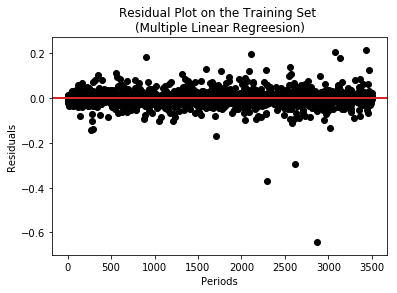

In [406]:
# training - residuals
plt.scatter(np.array(range(1,3503,1)), (y_train.reshape(-1) - y_pred_OLS_train), color = 'black')
plt.title('Residual Plot on the Training Set \n(Multiple Linear Regreesion)')
plt.xlabel('Periods')
plt.ylabel('Residuals')
l = plt.axhline(linewidth=2, color='#d62728')
plt.show()

In [399]:
y_test.shape

(876, 1)

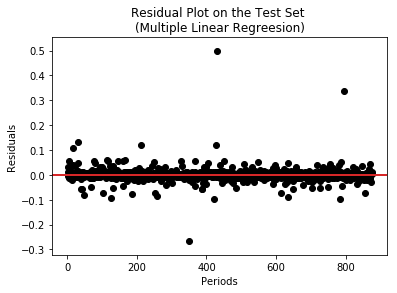

In [405]:
# test
plt.scatter(np.array(range(1,877,1)), (y_test.reshape(-1) - y_pred_OLS_test), color = 'black')
plt.title('Residual Plot on the Test Set \n(Multiple Linear Regreesion)')
plt.xlabel('Periods')
plt.ylabel('Residuals')
l = plt.axhline(linewidth=2, color='#d62728')
plt.show()

R-Squared

In [314]:
from sklearn.metrics import r2_score

r2_score(y_train, y_pred_OLS_train)

0.99933748099367503

In [315]:
r2_score(y_test, y_pred_OLS_test)

0.99907633716681465

In [316]:
# rmse
rmse(np.array(y_train), np.array(y_pred_OLS_train))

0.025856416182842158

In [317]:
rmse(np.array(y_test), np.array(y_pred_OLS_test))

0.029814531897241384

# Polynomial Regression

In [318]:
from sklearn.preprocessing import PolynomialFeatures

degress = 2

In [319]:
poly_reg_2 = PolynomialFeatures(degree = 2) 
X_poly_2 = poly_reg_2.fit_transform(X_train) # transform X_train
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_2, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [320]:
# predictions on the training set
y_pred_poly_2 = lin_reg_2.predict(poly_reg_2.fit_transform(X_train)) 

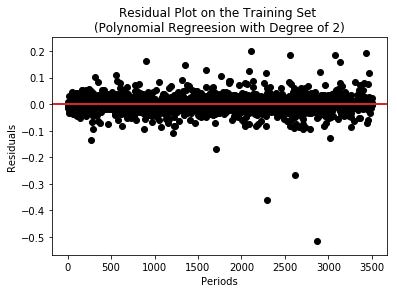

In [412]:
plt.scatter(np.array(range(1,3503,1)), (y_train - y_pred_poly_2), color = 'black')
plt.title('Residual Plot on the Training Set \n(Polynomial Regreesion with Degree of 2)')
plt.xlabel('Periods')
plt.ylabel('Residuals')
l = plt.axhline(linewidth=2, color='#d62728')
plt.show()

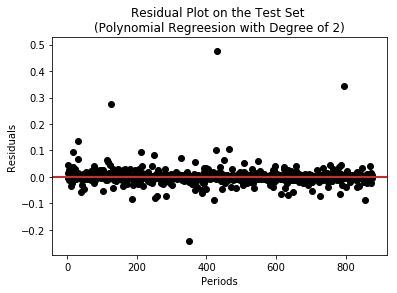

In [413]:
# predictions on the test set
y_pred_poly_2_test = lin_reg_2.predict(poly_reg_2.fit_transform(X_test)) 

plt.scatter(np.array(range(1,877,1)), (y_test - y_pred_poly_2_test), color = 'black')
plt.title('Residual Plot on the Test Set \n(Polynomial Regreesion with Degree of 2)')
plt.xlabel('Periods')
plt.ylabel('Residuals')
l = plt.axhline(linewidth=2, color='#d62728')
plt.show()

In [323]:
rmse(np.array(y_train), np.array(y_pred_poly_2))

0.024245976333168842

In [324]:
rmse(np.array(y_test), np.array(y_pred_poly_2_test))

0.02985898045403589

degree = 3

In [325]:
poly_reg_3 = PolynomialFeatures(degree = 3) 
X_poly_3 = poly_reg_3.fit_transform(X_train) 
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly_3, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [326]:
y_pred_poly_3 = lin_reg_3.predict(poly_reg_3.fit_transform(X_train)) 

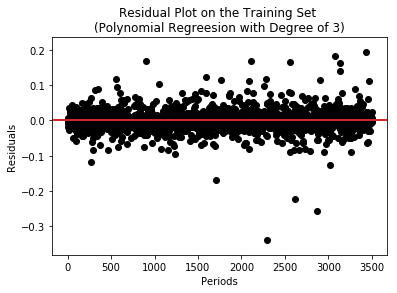

In [414]:
# training
plt.scatter(np.array(range(1,3503,1)), (y_train - y_pred_poly_3), color = 'black')
plt.title('Residual Plot on the Training Set \n(Polynomial Regreesion with Degree of 3)')
plt.xlabel('Periods')
plt.ylabel('Residuals')
l = plt.axhline(linewidth=2, color='#d62728')
plt.show()

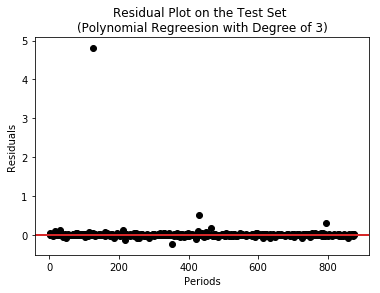

In [415]:
# test 
y_pred_poly_3_test = lin_reg_3.predict(poly_reg_3.fit_transform(X_test)) 

plt.scatter(np.array(range(1,877,1)), (y_test - y_pred_poly_3_test), color = 'black')
plt.title('Residual Plot on the Test Set \n(Polynomial Regreesion with Degree of 3)')
plt.xlabel('Periods')
plt.ylabel('Residuals')
l = plt.axhline(linewidth=2, color='#d62728')
plt.show()

In [329]:
rmse(np.array(y_train), np.array(y_pred_poly_3))

0.022249078026054324

In [330]:
rmse(np.array(y_test), np.array(y_pred_poly_3_test))

0.16526555055908426

degree = 4 

In [331]:
poly_reg_4 = PolynomialFeatures(degree = 4) 
X_poly_4 = poly_reg_4.fit_transform(X_train) 
lin_reg_4 = LinearRegression()
lin_reg_4.fit(X_poly_4, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [332]:
y_pred_poly_4 = lin_reg_4.predict(poly_reg_4.fit_transform(X_train)) 

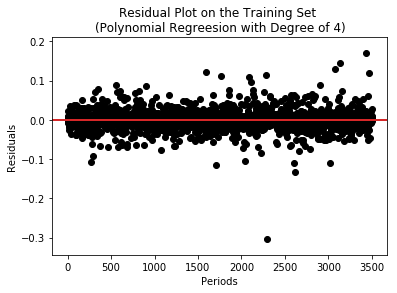

In [416]:
# training
plt.scatter(np.array(range(1,3503,1)), (y_train - y_pred_poly_4), color = 'black')
plt.title('Residual Plot on the Training Set \n(Polynomial Regreesion with Degree of 4)')
plt.xlabel('Periods')
plt.ylabel('Residuals')
l = plt.axhline(linewidth=2, color='#d62728')
plt.show()

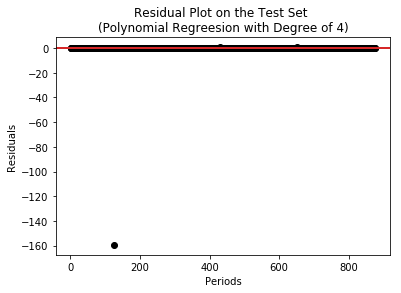

In [417]:
# test 
y_pred_poly_4_test = lin_reg_4.predict(poly_reg_4.fit_transform(X_test)) 

plt.scatter(np.array(range(1,877,1)), (y_test - y_pred_poly_4_test), color = 'black')
plt.title('Residual Plot on the Test Set \n(Polynomial Regreesion with Degree of 4)')
plt.xlabel('Periods')
plt.ylabel('Residuals')
l = plt.axhline(linewidth=2, color='#d62728')
plt.show()

The optimal degree is 2.

RMSE

In [335]:
rmse(np.array(y_train), np.array(y_pred_poly_4))

0.01896334661085219

In [336]:
rmse(np.array(y_test), np.array(y_pred_poly_4_test))

5.38558636929038

# Support Vector Regression

In [337]:
from sklearn.svm import SVR

In [338]:
regressor_SVR = SVR(kernel = 'rbf')

In [339]:
regressor_SVR.fit(X_train, y_train)

C:\Users\Shimeng Lin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

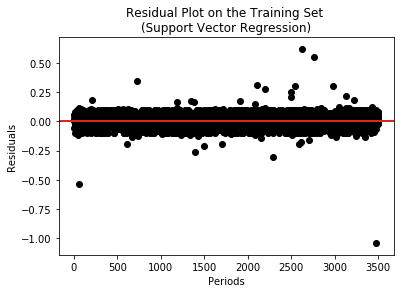

In [424]:
# training
plt.scatter(np.array(range(1,3503,1)), (y_train.reshape(-1) - regressor_SVR.predict(X_train)), color = 'black')
plt.title('Residual Plot on the Training Set \n(Support Vector Regression)')
plt.xlabel('Periods')
plt.ylabel('Residuals')
l = plt.axhline(linewidth=2, color='#d62728')
plt.show()

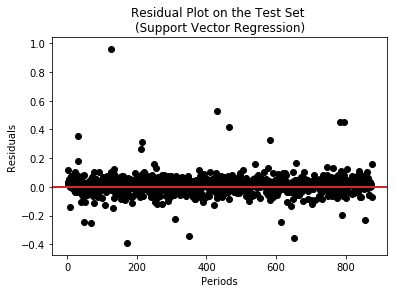

In [434]:
# test
plt.scatter(np.array(range(1,877,1)), (y_test.reshape(-1) - regressor_SVR.predict(X_test)), color = 'black')
plt.title('Residual Plot on the Test Set \n(Support Vector Regression)')
plt.xlabel('Periods')
plt.ylabel('Residuals')
l = plt.axhline(linewidth=2, color='#d62728')
plt.show()

RMSE

In [431]:
rmse(np.array(y_train), np.array(regressor_SVR.predict(X_train)))

0.05708746380117655

In [432]:
rmse(np.array(y_test), np.array(regressor_SVR.predict(X_test)))

0.075570146834819

# Random Forest Regression

In [344]:
from sklearn.ensemble import RandomForestRegressor 

The number of trees = 10

In [345]:
regressor_rf = RandomForestRegressor(n_estimators = 10, random_state = 0) 
regressor_rf.fit(X_train, y_train)

C:\Users\Shimeng Lin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [346]:
# training 
y_pred_rf_train = regressor_rf.predict(X_train) 

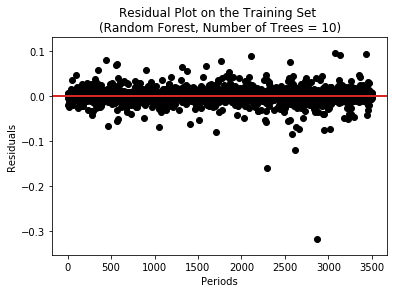

In [436]:
plt.scatter(np.array(range(1,3503,1)), (y_train.reshape(-1) - regressor_rf.predict(X_train)), color = 'black')
plt.title('Residual Plot on the Training Set \n(Random Forest, Number of Trees = 10)')
plt.xlabel('Periods')
plt.ylabel('Residuals')
l = plt.axhline(linewidth=2, color='#d62728')
plt.show()

In [348]:
# test 
y_pred_rf_test = regressor_rf.predict(X_test) 

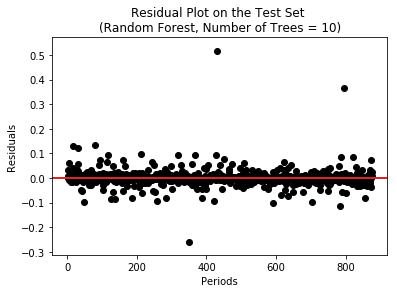

In [437]:
plt.scatter(np.array(range(1,877,1)), (y_test.reshape(-1) - regressor_rf.predict(X_test)), color = 'black')
plt.title('Residual Plot on the Test Set \n(Random Forest, Number of Trees = 10)')
plt.xlabel('Periods')
plt.ylabel('Residuals')
l = plt.axhline(linewidth=2, color='#d62728')
plt.show()

RMSE

In [350]:
rmse(np.array(y_train), np.array(y_pred_rf_train))

0.012771024204022935

In [351]:
rmse(np.array(y_test), np.array(y_pred_rf_test))

0.032763745421871084

The number of trees = 100

In [352]:
regressor_rf_100 = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor_rf_100.fit(X_train, y_train)

C:\Users\Shimeng Lin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [353]:
# predictions on training set
y_pred_rf100_train = regressor_rf_100.predict(X_train) 

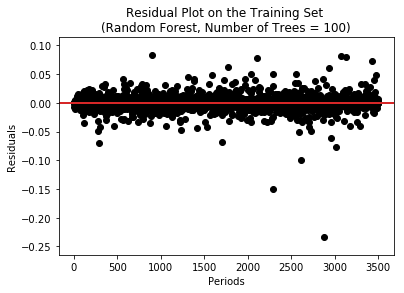

In [438]:
plt.scatter(np.array(range(1,3503,1)), (y_train.reshape(-1) - regressor_rf_100.predict(X_train)), color = 'black')
plt.title('Residual Plot on the Training Set \n(Random Forest, Number of Trees = 100)')
plt.xlabel('Periods')
plt.ylabel('Residuals')
l = plt.axhline(linewidth=2, color='#d62728')
plt.show()

In [355]:
# predictions on test set
y_pred_rf100_test = regressor_rf_100.predict(X_test) 

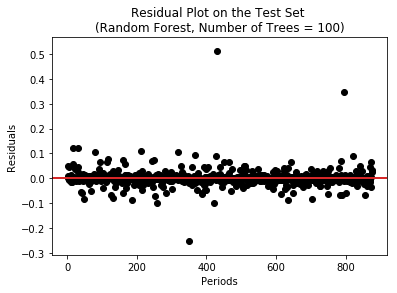

In [439]:
plt.scatter(np.array(range(1,877,1)), (y_test.reshape(-1) - regressor_rf_100.predict(X_test)), color = 'black')
plt.title('Residual Plot on the Test Set \n(Random Forest, Number of Trees = 100)')
plt.xlabel('Periods')
plt.ylabel('Residuals')
l = plt.axhline(linewidth=2, color='#d62728')
plt.show()

RMSE

In [357]:
rmse(np.array(y_train), np.array(y_pred_rf100_train))

0.010572703213644464

In [358]:
rmse(np.array(y_test), np.array(y_pred_rf100_test))

0.03149802017779088

The number of trees = 300

In [359]:
regressor_rf_300 = RandomForestRegressor(n_estimators = 300, random_state = 0) 
regressor_rf_300.fit(X_train, y_train)

C:\Users\Shimeng Lin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [360]:
# predictions on training set
y_pred_rf300_train = regressor_rf_300.predict(X_train) 

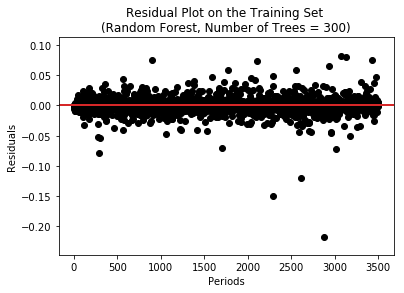

In [440]:
plt.scatter(np.array(range(1,3503,1)), (y_train.reshape(-1) - regressor_rf_300.predict(X_train)), color = 'black')
plt.title('Residual Plot on the Training Set \n(Random Forest, Number of Trees = 300)')
plt.xlabel('Periods')
plt.ylabel('Residuals')
l = plt.axhline(linewidth=2, color='#d62728')
plt.show()

In [362]:
# predictions on test set
y_pred_rf300_test = regressor_rf_300.predict(X_test) 

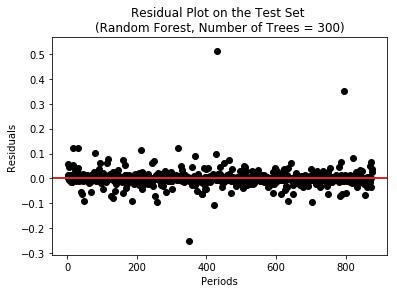

In [441]:
plt.scatter(np.array(range(1,877,1)), (y_test.reshape(-1) - regressor_rf_300.predict(X_test)), color = 'black')
plt.title('Residual Plot on the Test Set \n(Random Forest, Number of Trees = 300)')
plt.xlabel('Periods')
plt.ylabel('Residuals')
l = plt.axhline(linewidth=2, color='#d62728')
plt.show()

RMSE

In [364]:
rmse(np.array(y_train), np.array(y_pred_rf300_train))

0.010415711960384702

In [365]:
rmse(np.array(y_test), np.array(y_pred_rf300_test))

0.03167755776884682